In [2]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# File to Load
suicide_rates_1985_2021 = Path("Resources/suicide_rates_1985-2021.csv")

suicide_rates_df = pd.read_csv(suicide_rates_1985_2021)
suicide_rates_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [4]:
# List of columns
suicide_rates_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
# Remove "HDI for year" column 
suicide_rates_df = suicide_rates_df.drop('HDI for year', axis=1)
suicide_rates_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,"2,15,66,24,900",796.0,Boomers


In [6]:
# Total number of countries
country_count = suicide_rates_df['country'].nunique()
country_count

114

In [7]:
# Identifying the types of data
suicide_rates_df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no           float64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)      object
gdp_per_capita ($)    float64
generation             object
dtype: object

In [8]:
# Identifying the suicide count for 1990
suicide_rates_1990 = suicide_rates_df[suicide_rates_df['year'] == 1990]
suicide_rates_1990_cleaned=suicide_rates_1990.dropna()
grouped_by_year_1990 = pd.DataFrame(suicide_rates_1990.groupby('country')['suicides_no'].sum())
grouped_by_year_1990

,suicides_no
country,
Antigua and Barbuda,1.0
Argentina,2140.0
Armenia,93.0
Australia,2202.0
Austria,1825.0
...,...
Ukraine,10645.0
United Kingdom,4643.0
United States,30895.0


In [9]:
# Identifying the suicide count for 2019
suicide_rates_2019 = suicide_rates_df[suicide_rates_df['year'] == 2019]
suicide_rates_2019_cleaned=suicide_rates_2019.dropna()
grouped_by_year_2019 = pd.DataFrame(suicide_rates_2019_cleaned.groupby('country')['suicides_no'].sum())
grouped_by_year_2019

,suicides_no
country,
Argentina,3254.0
Armenia,49.0
Australia,3318.0
Austria,1113.0
Brazil,9892.0
Brunei Darussalam,8.0
Bulgaria,573.0
Canada,4449.0
Colombia,2930.0


In [10]:
#Grouping countires which have values in both 1990 and 2019
common_country_list = set(grouped_by_year_1990.index) & set(grouped_by_year_2019.index)
grouped_by_year_1990 = grouped_by_year_1990[grouped_by_year_1990.index.isin(common_country_list)]
grouped_by_year_1990

,suicides_no
country,
Argentina,2140.0
Armenia,93.0
Australia,2202.0
Austria,1825.0
Brazil,4803.0
Bulgaria,1323.0
Canada,3378.0
Colombia,865.0
Costa Rica,157.0


In [11]:
grouped_by_year_2019 = grouped_by_year_2019[grouped_by_year_2019.index.isin(common_country_list)]
grouped_by_year_2019

,suicides_no
country,
Argentina,3254.0
Armenia,49.0
Australia,3318.0
Austria,1113.0
Brazil,9892.0
Bulgaria,573.0
Canada,4449.0
Colombia,2930.0
Costa Rica,383.0


In [12]:
grouped_by_year_2019.groupby(["country"])[["suicides_no"]]
suicide_rates_2019

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
27902,Antigua and Barbuda,2019,male,5-14 years,NaN,92117,0.000000,Antigua and Barbuda2019,1687533333,17376.649680,Generation X
27903,Argentina,2019,male,5-14 years,39.0,44938712,0.086785,Argentina2019,4.52E+11,10056.637940,Generation X
27904,Armenia,2019,male,5-14 years,0.0,2820602,0.000000,Armenia2019,13619291361,4604.646324,Generation X
27905,Australia,2019,male,5-14 years,10.0,25340217,0.039463,Australia2019,1.39E+12,54875.285960,Generation X
27906,Austria,2019,male,5-14 years,1.0,8879920,0.011261,Austria2019,4.45E+11,50114.401110,Generation X
...,...,...,...,...,...,...,...,...,...,...,...
31587,Ukraine,2019,female,75+ years,264.0,44386203,0.594779,Ukraine2019,1.54E+11,3661.456204,G.I. Generation
31588,United Kingdom,2019,female,75+ years,85.0,66836327,0.127176,United Kingdom2019,2.88E+12,43070.498360,G.I. Generation
31589,United States of America,2019,female,75+ years,568.0,328329953,0.172997,United States of America2019,2.14E+13,65279.529030,G.I. Generation
31590,Uruguay,2019,female,75+ years,23.0,3428409,0.670865,Uruguay2019,61231149881,17688.015010,G.I. Generation


In [13]:

summery_df = suicide_rates_df.groupby(["country"])[["suicides/100k pop"]].agg(["mean", "median", "var", "std", "sem"])
summery_df.head()

suicides/100k pop                                        
                                 mean median         var        std       sem
country                                                                      
Albania                      3.502879  2.970   11.778946   3.432047  0.211228
Antigua and Barbuda          0.481559  0.000   10.018676   3.165229  0.164109
Argentina                    9.324805  4.680  133.655526  11.560948  0.564117
Armenia                      2.836908  1.355   13.675197   3.697999  0.198806
Aruba                        9.503095  0.000  625.830928  25.016613  1.930074

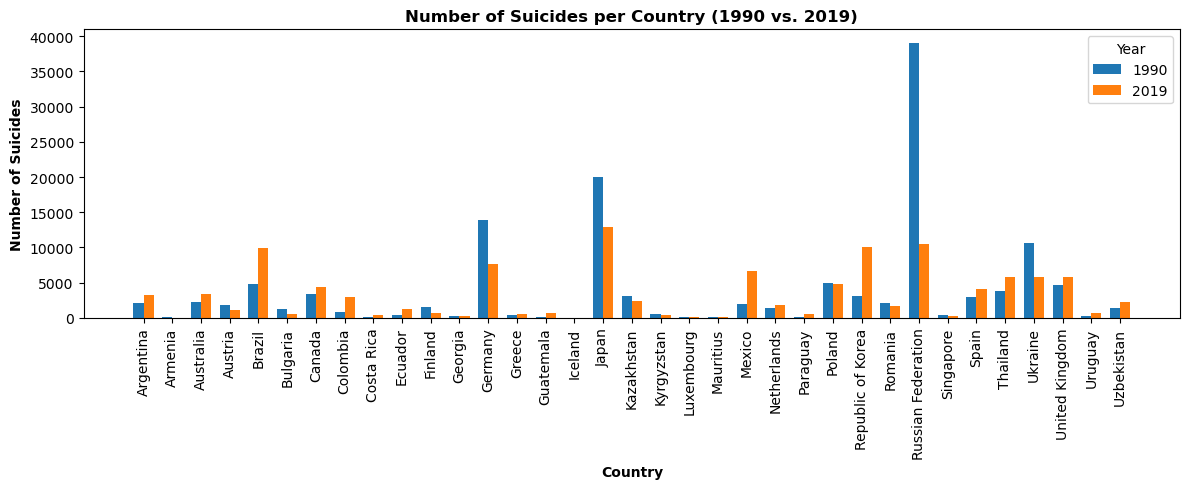

In [15]:
# Create an array of country names
countries = grouped_by_year_1990.index

# Create an array of indices to position the bars for 1990 and 2019
x = np.arange(len(countries))

# Width of each bar
width = 0.35

# Create subplots for side-by-side comparison
fig, ax = plt.subplots(figsize=(12, 5))

# Plot for 1990
ax.bar(x - width/2, grouped_by_year_1990['suicides_no'], width, label='1990')
# Plot for 2019
ax.bar(x + width/2, grouped_by_year_2019['suicides_no'], width, label='2019')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=90)
ax.set_xlabel('Country',fontweight='bold')
ax.set_ylabel('Number of Suicides',fontweight='bold')
ax.set_title('Number of Suicides per Country (1990 vs. 2019)',fontweight='bold')
# Set the legend
ax.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()

**Graph Analysis**

We used a bar graph to visualize the number of suicides in each country for the two years of 1990 and 2019.

The country with the highest number of suicides in 1990 is the Russian Federation with a number of (39,028), and the country with the highest number of suicides in 2019 is Japan with a number of (12,858).

Overall the number of suicides in 1990 is higher than the number of suicides in 2019.

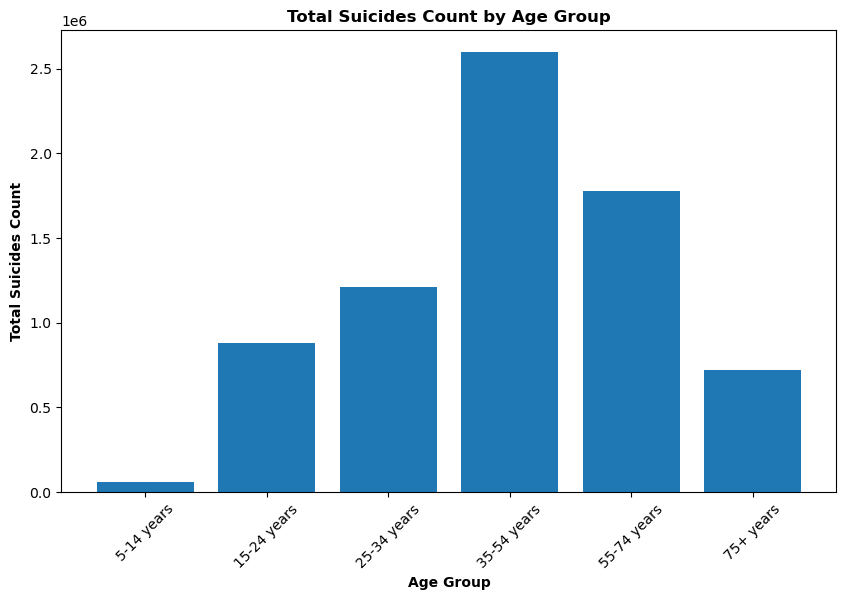

In [16]:
#Determine which age groups are most affected by suicide.

age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

age_suicide_counts = (
    suicide_rates_df.groupby('age')['suicides_no']
    .sum()
    .reindex(age_order)
    .reset_index()
)

plt.figure(figsize=(10, 6))
plt.bar(age_suicide_counts['age'], age_suicide_counts['suicides_no'])
plt.xlabel('Age Group',fontweight='bold')
plt.ylabel('Total Suicides Count',fontweight='bold')
plt.title('Total Suicides Count by Age Group',fontweight='bold')
plt.xticks(rotation=45)
plt.show()


**Graph Analysis**

We used a bar graph to visualize the total suicides count and the age group.

The age group with the highest number of suicides count is between 35 and 54, the second highest group of suicides count is between 55 and 74.

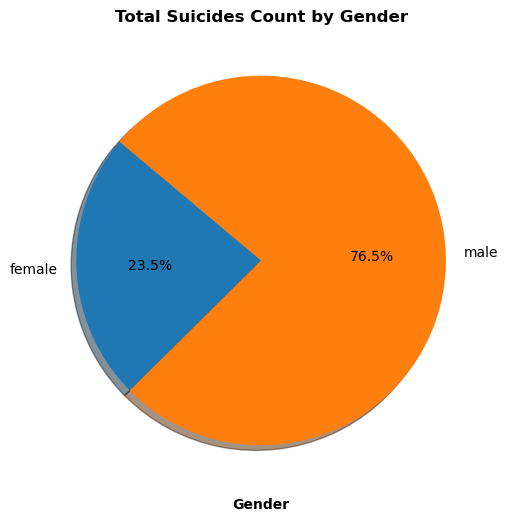

In [25]:
#Determine which gender is most affected by suicide.

gender_suicide_counts = suicide_rates_df.groupby('sex')['suicides_no'].sum().reset_index()

# Create a bar plot to compare male and female suicide counts
plt.figure(figsize=(8, 6))
labels = gender_suicide_counts['sex']
sizes = gender_suicide_counts['suicides_no']
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.xlabel('Gender',fontweight='bold')
#plt.ylabel('Total Suicides Count',fontweight='bold')
plt.title('Total Suicides Count by Gender',fontweight='bold')
plt.show()


**Graph Analysis**

We used a bar graph to visualize the total suicides count and gender in order to compare which gender has the highest number.

We concluded that males have three times higher count of suicides than females.

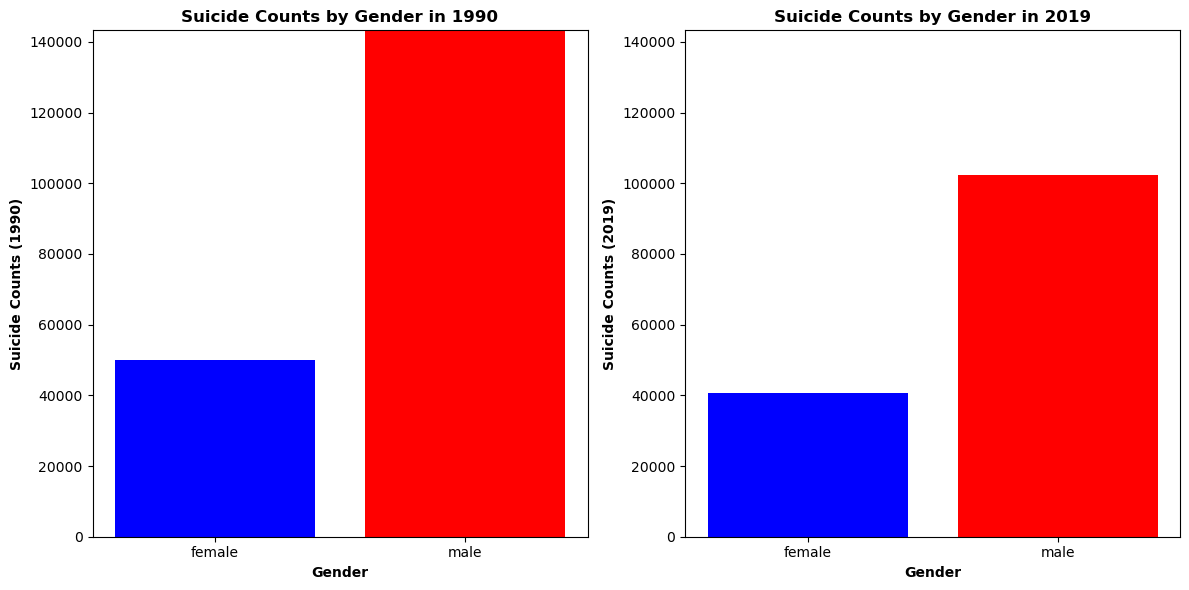

In [19]:
# Filter the data for the year 1990 and group by "sex" to get suicide counts
suicide_data_1990 = suicide_rates_df[suicide_rates_df['year'] == 1990]
gender_suicide_counts_1990 = suicide_data_1990.groupby('sex')['suicides_no'].sum().reset_index()

# Filter the data for the year 2019 and group by "sex" to get suicide counts
suicide_data_2019 = suicide_rates_df[suicide_rates_df['year'] == 2019]
gender_suicide_counts_2019 = suicide_data_2019.groupby('sex')['suicides_no'].sum().reset_index()

# Calculate the maximum y-axis value from both years
max_y = max(gender_suicide_counts_1990['suicides_no'].max(), gender_suicide_counts_2019['suicides_no'].max())

# Create subplots with two side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for 1990
axes[0].bar(gender_suicide_counts_1990['sex'], gender_suicide_counts_1990['suicides_no'], color=['blue', 'red'])
axes[0].set_xlabel('Gender',fontweight='bold')
axes[0].set_ylabel('Suicide Counts (1990)',fontweight='bold')
axes[0].set_title('Suicide Counts by Gender in 1990',fontweight='bold')
axes[0].set_ylim([0, max_y])  # Set the y-axis limit to match the maximum value

# Bar plot for 2019
axes[1].bar(gender_suicide_counts_2019['sex'], gender_suicide_counts_2019['suicides_no'], color=['blue', 'red'])
axes[1].set_xlabel('Gender',fontweight='bold')
axes[1].set_ylabel('Suicide Counts (2019)',fontweight='bold')
axes[1].set_title('Suicide Counts by Gender in 2019',fontweight='bold')
axes[1].set_ylim([0, max_y])  # Set the y-axis limit to match the maximum value

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


**Graph Analysis**

We used a bar graph to visualize the total suicides count and gender in order to compare which gender has the highest number suicides for year 1990 and 2019.


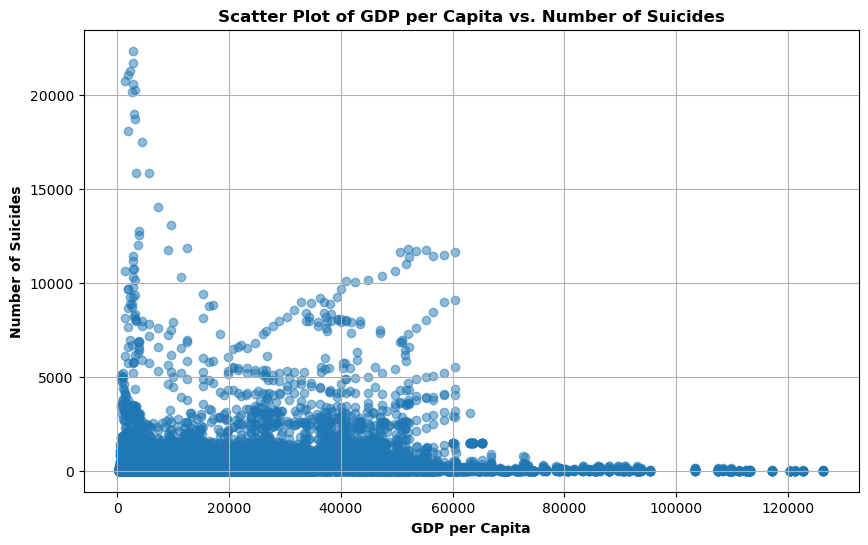

In [20]:
# Extract the relevant columns from the DataFrame
gdp_per_capita = suicide_rates_df['gdp_per_capita ($)']
suicides_no = suicide_rates_df['suicides_no']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gdp_per_capita, suicides_no, alpha=0.5)
plt.xlabel('GDP per Capita',fontweight='bold')
plt.ylabel('Number of Suicides',fontweight='bold')
plt.title('Scatter Plot of GDP per Capita vs. Number of Suicides',fontweight='bold')
plt.grid(True)
plt.show()
